In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [84]:
df = pd.read_csv("salaries.csv")

In [85]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [86]:
df.shape

(3755, 11)

In [87]:
for col in df:
    print(df[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0


In [88]:
df.duplicated().sum()

np.int64(1171)

In [89]:
df.drop_duplicates(inplace = True)

In [90]:
df.shape

(2584, 11)

In [91]:
for col in df.columns: 
    print(f'column : {col}')
    print(df[col].value_counts())
    print('*' * 20)

column : work_year
work_year
2023    1156
2022    1125
2021     228
2020      75
Name: count, dtype: int64
********************
column : experience_level
experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64
********************
column : employment_type
employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64
********************
column : job_title
job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64
********************
column : salary
salary
100000    70
120000    59
150000    58
200000    48
80000     46
          ..
126277     1
153088     1
323300     1
200160     1
41

In [92]:
df["job_title"].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [94]:
#PT: Part-time FT: Full-time CT: Contract FL: Freelance

In [95]:
cols_to_drop = ["work_year","salary","salary_currency","employee_residence","company_location","company_size"]

In [96]:
for col in cols_to_drop:
    df = df.drop(col, axis = 1)

In [97]:
df.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio
0,SE,FT,Principal Data Scientist,85847,100
1,MI,CT,ML Engineer,30000,100
2,MI,CT,ML Engineer,25500,100
3,SE,FT,Data Scientist,175000,100
4,SE,FT,Data Scientist,120000,100


In [98]:
df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [99]:
ml_eng = ["ML Engineer","Machine Learning Engineer","Principal Machine Learning Engineer","Lead Machine Learning Engineer","Applied Machine Learning Engineer",
          "Machine Learning Infrastructure Engineer","Machine Learning Software Engineer","Machine Learning Developer","Machine Learning Manager","Head of Machine Learning",
         "MLOps Engineer","Research Engineer","Deep Learning Engineer","Computer Vision Engineer","Computer Vision Software Engineer","3D Computer Vision Researcher","NLP Engineer",
         "AI Developer","AI Programmer","Autonomous Vehicle Technician","Data Science Engineer","Machine Learning Research Engineer"]

data_eng = ["Data Engineer","Big Data Engineer","Lead Data Engineer","Principal Data Engineer","Software Data Engineer",
          "Azure Data Engineer","Cloud Data Engineer","Marketing Data Engineer","BI Data Engineer","Data Infrastructure Engineer",
         "Data Operations Engineer","Data DevOps Engineer","ETL Engineer","ETL Developer","Data Architect","Principal Data Architect","Cloud Data Architect",
         "Big Data Architect","Data Modeler","Cloud Database Engineer","Data Manager","Data Lead","Manager Data Management"]

data_scs = ["Data Scientist","Principal Data Scientist","Applied Scientist","Research Scientist","Applied Data Scientist",
          "Data Strategist","Head of Data","Data Science Manager","Director of Data Science","Lead Data Scientist",
         "Staff Data Scientist","Data Science Lead","Data Science Consultant","Head of Data Science","Product Data Scientist","Data Science Tech Lead","Data Scientist Lead",
         "Machine Learning Scientist","Machine Learning Researcher","Deep Learning Researcher","Applied Machine Learning Scientist","AI Scientist"]

data_anl = ["Data Analyst","Data Quality Analyst","Compliance Data Analyst","Business Data Analyst","Staff Data Analyst",
          "Lead Data Analyst","Financial Data Analyst","Insight Analyst","Product Data Analyst","Marketing Data Analyst",
         "Principal Data Analyst","Finance Data Analyst","BI Analyst","BI Data Analyst","Business Intelligence Engineer","Analytics Engineer","Data Analytics Specialist",
         "Data Analytics Consultant","Data Analytics Engineer","Data Management Specialist","Data Specialist","Power BI Developer","BI Developer","Data Operations Analyst","Data Analytics Manager","Data Analytics Lead"]

In [100]:
for i in df["job_title"].unique():
    for j in ml_eng:
        if i == j:
            df["job_title"] = df["job_title"].replace(i, "Machine Learning Engineer")

In [101]:
for i in df["job_title"].unique():
    for j in data_eng:
        if i == j:
            df["job_title"] = df["job_title"].replace(i, "Data Engineer")

In [102]:
for i in df["job_title"].unique():
    for j in data_scs:
        if i == j:
            df["job_title"] = df["job_title"].replace(i, "Data Scientist")

In [103]:
for i in df["job_title"].unique():
    for j in data_anl:
        if i == j:
            df["job_title"] = df["job_title"].replace(i, "Data Analyst")

In [104]:
df.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio
0,SE,FT,Data Scientist,85847,100
1,MI,CT,Machine Learning Engineer,30000,100
2,MI,CT,Machine Learning Engineer,25500,100
3,SE,FT,Data Scientist,175000,100
4,SE,FT,Data Scientist,120000,100


In [105]:
df["job_title"].unique()

array(['Data Scientist', 'Machine Learning Engineer', 'Data Analyst',
       'Data Engineer'], dtype=object)

In [106]:
over_money = df[df["salary_in_usd"]>100000 && df["employment_type"] == "FT" && df["job_title"] == "Data Analyst"]
under = df[df["salary_in_usd"]<100000]

In [242]:
def zenginlik_kontrolu(row):
    salary = row["salary_in_usd"]
    job = row["job_title"]
    emp_type = row["employment_type"]
    exp = row["experience_level"]
    
    # Full Time (FT) Kontrolleri
    if emp_type == "FT":
        if job == "Data Analyst":
            if exp == "SE" and salary >= 150000:
                return 1
            elif exp == "MI" and salary >= 115000:
                return 1
            elif exp == "EN" and salary >= 85000:
                return 1
            elif exp == "EX" and salary >= 200000:
                return 1
        elif job == "Data Engineer":
            if exp == "SE" and salary >= 190000:
                return 1
            elif exp == "MI" and salary >= 145000:
                return 1
            elif exp == "EN" and salary >= 105000:
                return 1
            elif exp == "EX" and salary >= 260000:
                return 1
        elif job == "Data Scientist":
            if exp == "SE" and salary >= 215000:
                return 1
            elif exp == "MI" and salary >= 160000:
                return 1
            elif exp == "EN" and salary >= 115000:
                return 1
            elif exp == "EX" and salary >= 300000:
                return 1
        elif job == "Machine Learning Engineer":
            if exp == "SE" and salary >= 250000:
                return 1
            elif exp == "MI" and salary >= 180000:
                return 1
            elif exp == "EN" and salary >= 135000:
                return 1
            elif exp == "EX" and salary >= 350000:
                return 1
            
    # Part Time (PT) Kontrolleri
    elif emp_type == "PT":
        if job == "Data Analyst":
            if exp == "SE" and salary >= 75000:
                return 1
            elif exp == "MI" and salary >= 57500:
                return 1
            elif exp == "EN" and salary >= 42500:
                return 1
            elif exp == "EX" and salary >= 100000:
                return 1
        elif job == "Data Engineer":
            if exp == "SE" and salary >= 95000:
                return 1
            elif exp == "MI" and salary >= 72500:
                return 1
            elif exp == "EN" and salary >= 52500:
                return 1
            elif exp == "EX" and salary >= 130000:
                return 1
        elif job == "Data Scientist":
            if exp == "SE" and salary >= 107500:
                return 1
            elif exp == "MI" and salary >= 80000:
                return 1
            elif exp == "EN" and salary >= 57500:
                return 1
            elif exp == "EX" and salary >= 150000:
                return 1
        elif job == "Machine Learning Engineer":
            if exp == "SE" and salary >= 125000:
                return 1
            elif exp == "MI" and salary >= 90000:
                return 1
            elif exp == "EN" and salary >= 67500:
                return 1
            elif exp == "EX" and salary >= 175000:
                return 1
                
    elif emp_type == "CT":
        if job == "Data Analyst":
            if exp == "SE" and salary >= 120000:
                return 1
            elif exp == "MI" and salary >= 90000:
                return 1
            elif exp == "EN" and salary >= 65000:
                return 1
            elif exp == "EX" and salary >= 160000:
                return 1
        elif job == "Data Engineer":
            if exp == "SE" and salary >= 150000:
                return 1
            elif exp == "MI" and salary >= 110000:
                return 1
            elif exp == "EN" and salary >= 80000:
                return 1
            elif exp == "EX" and salary >= 200000:
                return 1
        elif job == "Data Scientist":
            if exp == "SE" and salary >= 170000:
                return 1
            elif exp == "MI" and salary >= 80000:
                return 1
            elif exp == "EN" and salary >= 57500:
                return 1
            elif exp == "EX" and salary >= 150000:
                return 1
        elif job == "Machine Learning Engineer":
            if exp == "SE" and salary >= 125000:
                return 1
            elif exp == "MI" and salary >= 125000:
                return 1
            elif exp == "EN" and salary >= 85000:
                return 1
            elif exp == "EX" and salary >= 240000:
                return 1
                
    elif emp_type == "FL":
        if job == "Data Analyst":
            if exp == "SE" and salary >= 115000:
                return 1
            elif exp == "MI" and salary >= 85000:
                return 1
            elif exp == "EN" and salary >= 60000:
                return 1
            elif exp == "EX" and salary >= 180000:
                return 1
        elif job == "Data Engineer":
            if exp == "SE" and salary >= 150000:
                return 1
            elif exp == "MI" and salary >= 110000:
                return 1
            elif exp == "EN" and salary >= 160000:
                return 1
            elif exp == "EX" and salary >= 230000:
                return 1
        elif job == "Data Scientist":
            if exp == "SE" and salary >= 185000:
                return 1
            elif exp == "MI" and salary >= 120000:
                return 1
            elif exp == "EN" and salary >= 80000:
                return 1
            elif exp == "EX" and salary >= 280000:
                return 1
        elif job == "Machine Learning Engineer":
            if exp == "SE" and salary >= 220000:
                return 1
            elif exp == "MI" and salary >= 140000:
                return 1
            elif exp == "EN" and salary >= 95000:
                return 1
            elif exp == "EX" and salary >= 350000:
                return 1
    # Hiçbirine uymuyorsa
    return 0

# Fonksiyonu DataFrame'e uygula (axis=1 satır satır demektir)
over_money["is_rich"] = over_money.apply(zenginlik_kontrolu, axis=1)
under["is_rich"] = under.apply(zenginlik_kontrolu, axis=1)


In [243]:
over_money.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,is_rich
3,SE,FT,Data Scientist,175000,100,0
4,SE,FT,Data Scientist,120000,100,0
5,SE,FT,Data Scientist,222200,0,1
6,SE,FT,Data Scientist,136000,0,0
7,SE,FT,Data Scientist,219000,0,1


In [244]:
under.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,is_rich
0,SE,FT,Data Scientist,85847,100,0
1,MI,CT,Machine Learning Engineer,30000,100,0
2,MI,CT,Machine Learning Engineer,25500,100,0
10,SE,FT,Data Scientist,90700,0,0
16,SE,FT,Data Engineer,90700,0,0


In [111]:
df.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio
0,SE,FT,Data Scientist,85847,100
1,MI,CT,Machine Learning Engineer,30000,100
2,MI,CT,Machine Learning Engineer,25500,100
3,SE,FT,Data Scientist,175000,100
4,SE,FT,Data Scientist,120000,100


In [245]:
df_merged = pd.concat([under, over_money], ignore_index=True, sort=False)

In [246]:
df_merged.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,is_rich
0,SE,FT,Data Scientist,85847,100,0
1,MI,CT,Machine Learning Engineer,30000,100,0
2,MI,CT,Machine Learning Engineer,25500,100,0
3,SE,FT,Data Scientist,90700,0,0
4,SE,FT,Data Engineer,90700,0,0


In [247]:
df_merged = df_merged.rename(columns = {"salary_in_usd":"Salary", "remote_ratio":"Remote?","employment_type":"Employment Type","experience_level":"Experience Level","job_title":"Job Title","is_rich":"Is rich?"})

In [311]:
df_merged.head()
df_merged.to_csv("main-data.csv")

In [144]:
df_merged["Is rich?"].isnull().sum()

np.int64(0)

In [249]:
for col in df_merged.columns: 
    print(f'column : {col}')
    print(df_merged[col].value_counts())
    print('*' * 20)

column : Experience Level
Experience Level
SE    1534
MI     643
EN     254
EX      95
Name: count, dtype: int64
********************
column : Employment Type
Employment Type
FT    2493
PT      16
CT       9
FL       8
Name: count, dtype: int64
********************
column : Job Title
Job Title
Data Scientist               826
Data Engineer                737
Data Analyst                 593
Machine Learning Engineer    370
Name: count, dtype: int64
********************
column : Salary
Salary
150000    56
120000    51
200000    47
130000    39
135000    36
          ..
47899      1
66022      1
56738      1
45896      1
412000     1
Name: count, Length: 1034, dtype: int64
********************
column : Remote?
Remote?
100    1181
0      1163
50      182
Name: count, dtype: int64
********************
column : Is rich?
Is rich?
0    1985
1     541
Name: count, dtype: int64
********************


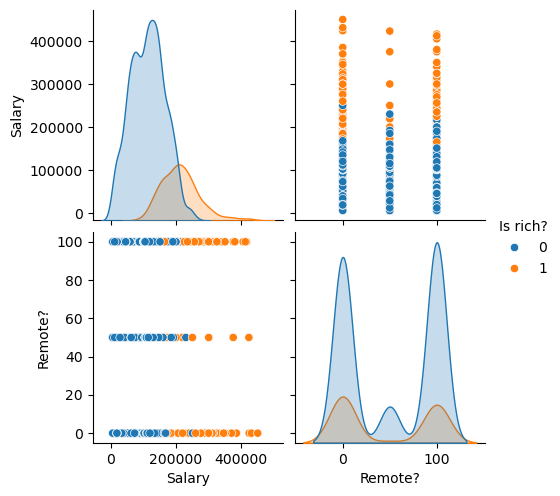

In [250]:
sns.pairplot(df_merged,hue = "Is rich?")
plt.show()

In [251]:
cat_col = ["Experience Level", "Employment Type","Job Title"]

ordinal_encoder = OrdinalEncoder(categories = [["SE","MI","EN","EX"],["FT","PT","CT","FL"],["Data Scientist","Data Engineer","Data Analyst","Machine Learning Engineer"]])

preprocessor = ColumnTransformer(transformers = [
    ("transformation_name",ordinal_encoder,cat_col)
],remainder = "passthrough")

In [289]:
X = df_merged.drop("Is rich?", axis = 1)
y = df_merged["Is rich?"]

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=15)

In [291]:
X_train.head()

,Experience Level,Employment Type,Job Title,Salary,Remote?
773,MI,FT,Data Analyst,98000,0
911,SE,FT,Data Engineer,252000,0
1439,SE,FT,Machine Learning Engineer,107309,2
2003,SE,FT,Data Scientist,180000,0
1169,MI,FT,Data Analyst,128000,0


In [294]:
X_cols = X_train.columns

In [276]:
pd.DataFrame(X_train_transformed)[4].unique()

array([0., 2., 1.])

In [277]:
remote = [0,1,2]

In [278]:
for i in df_merged["Remote?"].unique():
    if i == 0:
        df_merged["Remote?"] = df_merged["Remote?"].replace(i, 0)
    elif i == 50:
        df_merged["Remote?"] = df_merged["Remote?"].replace(i, 1)
    elif i == 100:
        df_merged["Remote?"] = df_merged["Remote?"].replace(i, 2)
        

In [279]:
df_merged.head()

,Experience Level,Employment Type,Job Title,Salary,Remote?,Is rich?
0,SE,FT,Data Scientist,85847,2,0
1,MI,CT,Machine Learning Engineer,30000,2,0
2,MI,CT,Machine Learning Engineer,25500,2,0
3,SE,FT,Data Scientist,90700,0,0
4,SE,FT,Data Engineer,90700,0,0


In [292]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [280]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [295]:
cols = preprocessor.get_feature_names_out()

In [296]:
X_train = pd.DataFrame(X_train_transformed, columns = cols, index = X_train.index)
X_test = pd.DataFrame(X_test_transformed, columns = cols, index = X_test.index)

In [297]:
X_train.head()

,transformation_name__Experience Level,transformation_name__Employment Type,transformation_name__Job Title,remainder__Salary,remainder__Remote?
773,1.0,0.0,2.0,98000.0,0.0
911,0.0,0.0,1.0,252000.0,0.0
1439,0.0,0.0,3.0,107309.0,2.0
2003,0.0,0.0,0.0,180000.0,0.0
1169,1.0,0.0,2.0,128000.0,0.0


In [301]:
X_train = pd.DataFrame(X_train, columns = X_cols)
X_test = pd.DataFrame(X_test, columns = X_cols)

In [299]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [302]:
X_train.head()

,transformation_name__Experience Level,transformation_name__Employment Type,transformation_name__Job Title,remainder__Salary,remainder__Remote?
0,1.0,0.0,0.5,-0.340033,-0.5
1,0.0,0.0,0.0,1.296376,-0.5
2,0.0,0.0,1.0,-0.241115,0.5
3,0.0,0.0,-0.5,0.531302,-0.5
4,1.0,0.0,0.5,-0.021252,-0.5


In [303]:
rfc = RandomForestClassifier(n_estimators = 10, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [304]:
y_pred = rfc.predict(X_test)

In [305]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9881422924901185
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       402
           1       1.00      0.94      0.97       104

    accuracy                           0.99       506
   macro avg       0.99      0.97      0.98       506
weighted avg       0.99      0.99      0.99       506

[[402   0]
 [  6  98]]


In [306]:
rf_params = {
    "n_estimators":[100,200,500,1000],
    "max_depth": [5,8,15,10,None],
    "max_features": ["sqrt","log2",None,5,6,7,8],
    "min_samples_split": [2,8,15,20]
}
rfc = RandomForestClassifier(class_weight='balanced', random_state=42) 
rscv = RandomizedSearchCV(estimator = rfc, param_distributions=rf_params,cv=3,n_jobs=-1, scoring='f1')
rscv.fit(X_train,y_train)
y_pred = rscv.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9960474308300395
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      0.98      0.99       104

    accuracy                           1.00       506
   macro avg       1.00      0.99      0.99       506
weighted avg       1.00      1.00      1.00       506

[[402   0]
 [  2 102]]


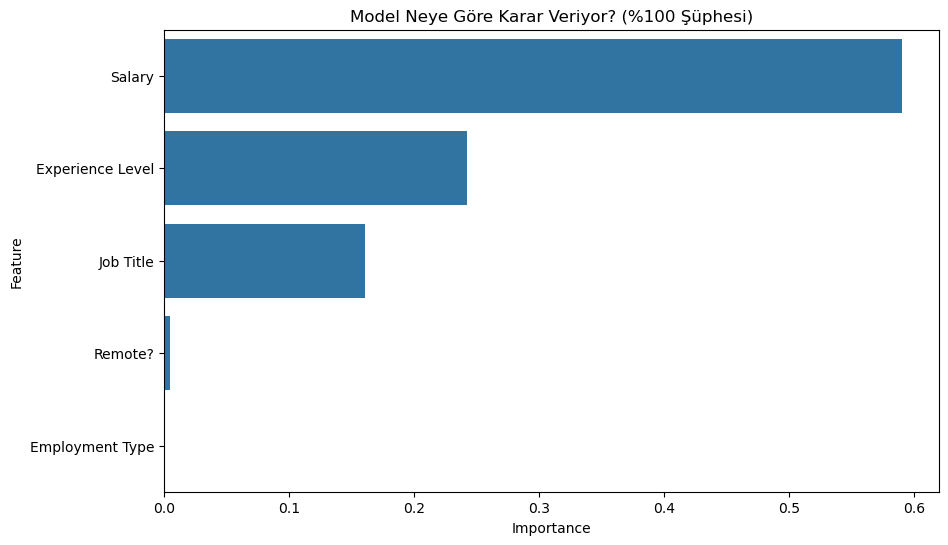

In [307]:
# Modelin en iyi halini (best_estimator_) alıyoruz
best_rf = rscv.best_estimator_
# Hangi özellik ne kadar etkili olmuş?
importances = best_rf.feature_importances_
feature_names = df_merged.drop("Is rich?", axis=1).columns 

feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# İlk 10 özelliği çizdirelim
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10))
plt.title('Model Neye Göre Karar Veriyor? (%100 Şüphesi)')
plt.show()


Detaylı Rapor:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      0.98      0.99       104

    accuracy                           1.00       506
   macro avg       1.00      0.99      0.99       506
weighted avg       1.00      1.00      1.00       506



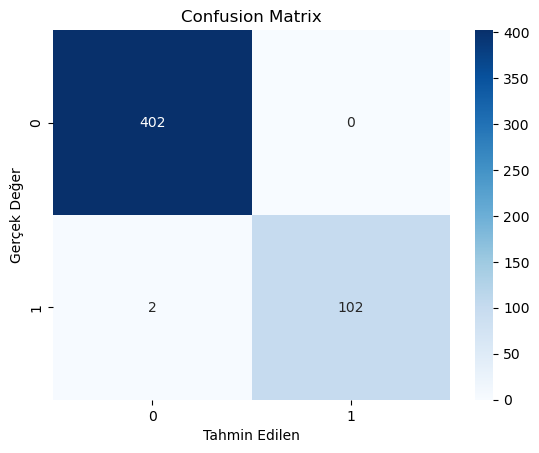

In [308]:
print("\nDetaylı Rapor:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix')
plt.show()

In [309]:
rf_params

{'n_estimators': [100, 200, 500, 1000],
 'max_depth': [5, 8, 15, 10, None],
 'max_features': ['sqrt', 'log2', None, 5, 6, 7, 8],
 'min_samples_split': [2, 8, 15, 20]}

In [310]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'max_features': None,
 'max_depth': None}